In [1]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data set

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/student_info.csv", header=0)

In [3]:
#how to check header section
dataset.head(5)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
#how to check shape of the data set
print("shape of the data set: ", dataset.shape)

shape of the data set:  (200, 2)


In [5]:
#coluumns of the data set
dataset.columns

Index(['study_hours', 'student_marks'], dtype='object')

In [6]:
# statistical measures of the data
dataset.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [7]:
# information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
#how to check Null values
dataset.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
#how to fill nan values on the dataset
df = dataset.fillna(dataset.mean())

In [10]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

Visulization

In [11]:
dataset = df

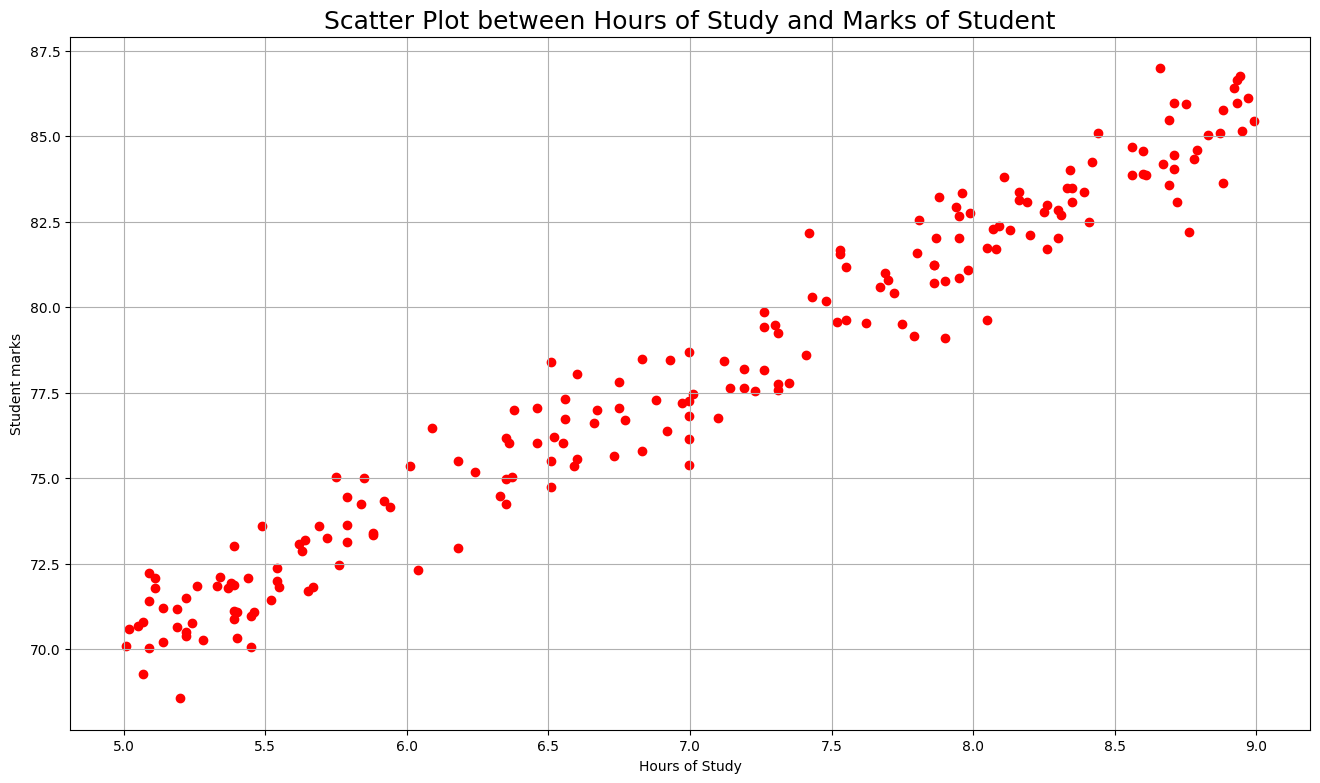

In [12]:
plt.figure(figsize = (16,9))
plt.scatter(dataset.study_hours, dataset.student_marks, color = 'red' )
plt.xlabel("Hours of Study")
plt.ylabel("Student marks")
plt.title("Scatter Plot between Hours of Study and Marks of Student", fontsize = 18)
plt.grid(True)  # Add grid to the plot
plt.show()

Note - Above data is trending onwords.

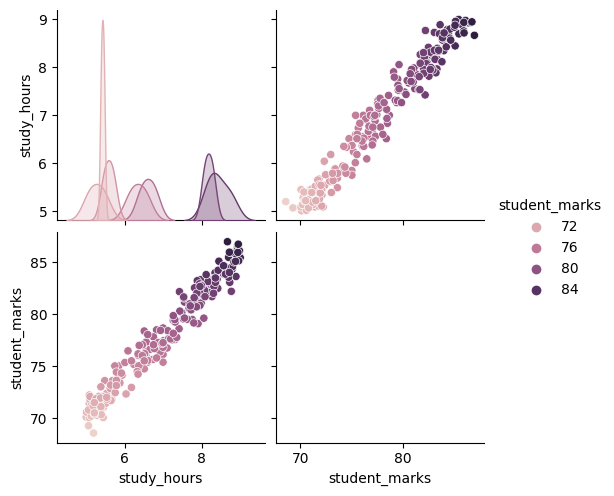

In [13]:
# pair plot in dataset of outcome with all columns
sns.pairplot(dataset, hue= 'student_marks',vars = ['study_hours', 'student_marks'])

In [14]:
X = dataset.drop('student_marks', axis = 'columns')
Y = dataset.drop('study_hours', axis = 'columns')
#how to check shape of the dataset
print("Shape of X = : ", X.shape)
print("Shape of Y = : ", Y.shape)

Shape of X = :  (200, 1)
Shape of Y = :  (200, 1)


How to split the data

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 51)

In [16]:
#how to check shape of the data set

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of Y_test : ", X_test.shape)

Shape of X_train :  (160, 1)
Shape of X_test :  (40, 1)
Shape of Y_train :  (160, 1)
Shape of Y_test :  (40, 1)


Model Building

In [17]:
#how to fit the model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [18]:
#how to calculate the coefficient
lr.coef_

array([[3.93571802]])

In [19]:
#how to calculate the intercept
lr.intercept_

array([50.44735504])

Prediction

In [20]:
lr.predict([[8]])[0][0].round()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.0

In [21]:
Y_pred = lr.predict(X_test)
Y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [22]:
pd.DataFrame(np.c_[X_test,Y_test, Y_pred], columns = ['study_hours', 'student_marks_orginal','student_marks_predicted'])

,study_hours,student_marks_orginal,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [23]:
#how to calculate the score
lr.score(X_test, Y_test)

0.9514124242154466

In [24]:
import pickle
filename = "lr_model.pkl"
pickle.dump(lr, open(filename, 'wb'))